In [1]:
import pandas as pd
!pip install numpy pandas
!pip install openpyxl #attribute to install excel reading
%pip install matplotlib seaborn plotly seaborn yfinance statsmodel.api
%pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas import to_datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#attribute'

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel.api (from versions: none)
ERROR: No matching distribution found for statsmodel.api

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#reading in all the cleaned dataframes

Inflation_diff = pd.read_csv('Inflation_diff.csv')
Interest_diff = pd.read_csv('Interest_diff.csv')
Current_account_diff = pd.read_csv('Current_account_diff.csv')
swaps_df = pd.read_csv('merged_df_month_year.csv')

In [3]:
#now run the regressiosn since all the data is ready, explore !!!!!

In [4]:
#checking if the dataframes have the same number of rows
print(f"Inflation_diff rows: {len(Inflation_diff)}")
print(f"Interest_diff rows: {len(Interest_diff)}")
print(f"Current_account_diff rows: {len(Current_account_diff)}")
print(f"swaps_df rows: {len(swaps_df)}")


Inflation_diff rows: 235
Interest_diff rows: 235
Current_account_diff rows: 235
swaps_df rows: 235


In [5]:
#lets check the first and last dates
print(f"Inflation_diff first date: {Inflation_diff['Date'].min()}")
print(f"Inflation_diff last date: {Inflation_diff['Date'].max()}")
print(f"Interest_diff first date: {Interest_diff['Date'].min()}")
print(f"Interest_diff last date: {Interest_diff['Date'].max()}")
print(f"Current_account_diff first date: {Current_account_diff['Date'].min()}")
print(f"Current_account_diff last date: {Current_account_diff['Date'].max()}")
print(f"swaps_df first date: {swaps_df['month-year'].min()}")
print(f"swaps_df last date: {swaps_df['month-year'].max()}")
#now we see that the swaps_df has dates, lets change it to month_year format. 

Inflation_diff first date: 2006-01
Inflation_diff last date: 2025-07
Interest_diff first date: 2006-01
Interest_diff last date: 2025-07
Current_account_diff first date: 2006-01
Current_account_diff last date: 2025-07
swaps_df first date: 2006-01
swaps_df last date: 2025-07


In [6]:
#lets create a function to divide the dataframe into train and test sets, based on the date
def train_test_split_by_date(df, date_column, test_size=0.2):
    """
    Splits the dataframe into train and test sets based on the date.
    
    Parameters:
    df (DataFrame): The dataframe to split.
    date_column (str): The name of the date column.
    test_size (float): The proportion of the dataset to include in the test split.
    
    Returns:
    DataFrame: Train set.
    DataFrame: Test set.
    """
    df[date_column] = pd.to_datetime(df[date_column])
    cutoff_date = df[date_column].quantile(1 - test_size)
    
    train_set = df[df[date_column] < cutoff_date]
    test_set = df[df[date_column] >= cutoff_date]
    
    return train_set, test_set

train_test_split_by_date(Inflation_diff, 'Date')
train_set_inflation, test_set_inflation = train_test_split_by_date(Inflation_diff, 'Date')

train_test_split_by_date(Interest_diff, 'Date')
train_set_interest, test_set_interest = train_test_split_by_date(Interest_diff, 'Date')
train_test_split_by_date(Current_account_diff, 'Date')
train_set_current, test_set_current = train_test_split_by_date(Current_account_diff, 'Date')
train_test_split_by_date(swaps_df, 'month-year')
train_set_swaps, test_set_swaps = train_test_split_by_date(swaps_df, 'month-year')


poor fitting to test values, lets figure out our next steps

In [7]:
#train_test_split by timeseries, without any differencing methods

X1_inflation_train = train_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_train = train_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_train = train_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_train = np.hstack((X1_inflation_train, X2_interest_train, X3_current_account_train))
#test_values 
X1_inflation_test = test_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_test = test_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_test = test_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_test = np.hstack((X1_inflation_test, X2_interest_test, X3_current_account_test))



model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y'])

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y']))
print(model_USDJPY.score(X_inflation_interest_current_test, test_set_swaps['USDJPY_20Y']))




0.33308654871471977
-2.6089431585511553


In [8]:
#train_test_split by timeseries, with pct differencing methods for swaps
#now lets try to convert the exchange rate data by returns, itll allow for stationary data
Y_train_USDJPY_pct = train_set_swaps['USDJPY_20Y'].pct_change()
Y_train_USDJPY_pct = Y_train_USDJPY_pct.fillna(0)  # Fill NaN values with 0

Y_test_USDJPY_pct = test_set_swaps['USDJPY_20Y'].pct_change()
Y_test_USDJPY_pct = Y_test_USDJPY_pct.fillna(0)

print(Y_train_USDJPY_pct.head())

#fitting the data

model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, Y_train_USDJPY_pct)

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, Y_train_USDJPY_pct))
print(model_USDJPY.score(X_inflation_interest_current_test, Y_test_USDJPY_pct))


0    0.000000
1    0.020351
2   -0.004656
3   -0.003106
4   -0.043918
Name: USDJPY_20Y, dtype: float64
0.06918094097600258
-0.18127276282691795


In [9]:
print(X_inflation_interest_current_train)

[[ 4.49  4.29 -9.3 ]
 [ 4.49  4.49 -9.3 ]
 [ 4.59  4.59 -9.3 ]
 [ 4.79  4.79 -9.3 ]
 [ 4.94  4.94 -9.3 ]
 [ 4.99  4.99 -9.38]
 [ 4.99  4.99 -9.38]
 [ 5.    5.   -9.38]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 4.99  4.99 -9.54]
 [ 5.    5.   -9.54]
 [ 4.76  4.76 -9.54]
 [ 4.76  4.76 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.84]
 [ 4.76  4.76 -9.84]
 [ 4.52  4.52 -9.84]
 [ 4.44  4.44 -9.73]
 [ 4.26  4.26 -9.73]
 [ 3.99  3.99 -9.73]
 [ 3.74  3.74 -9.52]
 [ 3.44  3.44 -9.52]
 [ 2.48  2.48 -9.52]
 [ 2.11  2.11 -9.31]
 [ 1.78  1.78 -9.31]
 [ 1.48  1.48 -9.31]
 [ 1.5   1.5  -8.78]
 [ 1.51  1.51 -8.78]
 [ 1.5   1.5  -8.78]
 [ 1.31  1.31 -8.24]
 [ 0.67  0.67 -8.24]
 [ 0.09  0.09 -8.24]
 [ 0.06  0.06 -7.57]
 [ 0.05  0.05 -7.57]
 [ 0.12  0.12 -7.57]
 [ 0.08  0.08 -6.28]
 [ 0.05  0.05 -6.28]
 [ 0.08  0.08 -6.28]
 [ 0.11  0.11 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.05  0.05 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02

In [10]:
# train_test_split by timeseries, with pct differencing methods for swaps, and then apply differencing to the independent variables
#copy the indepdent variables to a new df
Current_account_diff_imp3 = Current_account_diff.copy()
Inflation_diff_imp3 = Inflation_diff.copy()
Interest_diff_imp3 = Interest_diff.copy()

# Now we can apply differencing to the independent variables
Current_account_diff_imp3['USDJPY'] = Current_account_diff_imp3['USDJPY'].diff().fillna(0)
Inflation_diff_imp3['USDJPY'] = Inflation_diff_imp3['USDJPY'].diff().fillna(0)
Interest_diff_imp3['USDJPY'] = Interest_diff_imp3['USDJPY'].diff().fillna(0)

#split into trainign and test_set_current
train_set_current_diff_imp3, test_set_current_diff_imp3 = train_test_split_by_date(Current_account_diff_imp3, 'Date')
train_set_inflation_diff_imp3, test_set_inflation_diff_imp3 = train_test_split_by_date(Inflation_diff_imp3, 'Date')
train_set_interest_diff_imp3, test_set_interest_diff_imp3 = train_test_split_by_date(Interest_diff_imp3, 'Date')

# Now we can create the independent variables for the model
X1_inflation_diff_imp3_train = train_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_train = train_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_train = train_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_diff_imp3_train = np.hstack((X1_inflation_diff_imp3_train, X2_interest_diff_imp3_train, X3_current_account_diff_imp3_train))
#test values
X1_inflation_diff_imp3_test = test_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_test = test_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_test = test_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_diff_imp3_test = np.hstack((X1_inflation_diff_imp3_test, X2_interest_diff_imp3_test, X3_current_account_diff_imp3_test))
#fitting the data
model_USDJPY_diff_imp3 = LinearRegression()
model_USDJPY_diff_imp3.fit(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct)
Y_pred_USDJPY_diff_imp3_test= model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_test) #wrong code, need to find the predicted returns for my  test set
Y_pred_USDJPY_diff_imp3_train = model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_train) 
# Now we can evaluate the model
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct))
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_test, Y_test_USDJPY_pct))



0.04263092233555965
-0.06540518067604428


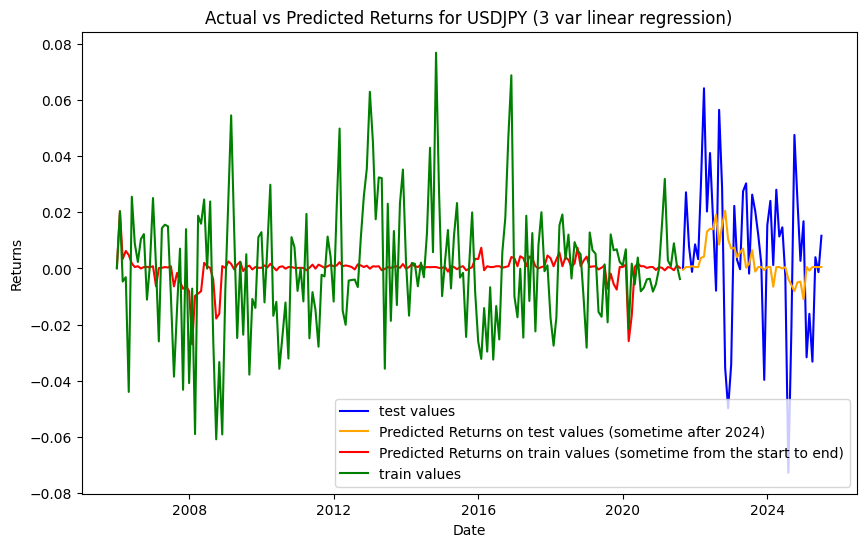

In [11]:
#lets plot the results for implementation three
plt.figure(figsize=(10, 6))
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='test values', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_test, label='Predicted Returns on test values (sometime after 2024)', color='orange')
plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_train, label = 'Predicted Returns on train values (sometime from the start to end)', color = 'red')
plt.plot(train_set_swaps['month-year'],Y_train_USDJPY_pct, label='train values', color='green')
#plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3, label='Predicted Returns', color='orange')
plt.title('Actual vs Predicted Returns for USDJPY (3 var linear regression)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [12]:
#from the above visualization, we can see that the model tends closer to the mean returns, some possible reasons may include
'''

Linear Model Limitation:
Linear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.

Low Feature Correlation:
Your independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.

Multicollinearity:
If your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.

Data Leakage or Misalignment:
If your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.

Incorrect Preprocessing:
Issues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.

Over-regularization:
If you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.

Insufficient Model Complexity:
Real-world financial data often requires more complex models (e.g., tree-based, neural networks, time series models) to capture volatility and patterns.
'''

'\n\nLinear Model Limitation:\nLinear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.\n\nLow Feature Correlation:\nYour independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.\n\nMulticollinearity:\nIf your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.\n\nData Leakage or Misalignment:\nIf your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.\n\nIncorrect Preprocessing:\nIssues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.\n\nOver-regularization:\nIf you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.\n\nInsufficient Model Complexit

In [13]:
#try other models more fitted to financial returns, lets try polynomial regression


In [14]:
X_train = X_inflation_interest_current_diff_imp3_train
X_test = X_inflation_interest_current_diff_imp3_test

Y_train= Y_train_USDJPY_pct
Y_test = Y_test_USDJPY_pct
poly = PolynomialFeatures(degree=4) # You can adjust the degree as needed
X_poly_train= poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
#fitting the model_USDJPY
model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_train)
#predicted for both test and train values
y_pred_train = model_poly.predict(X_poly_train)
y_pred_test = model_poly.predict(X_poly_test)  
#model scores
print(model_poly.score(X_poly_train, Y_train))
print(model_poly.score(X_poly_test, Y_test))


0.1506773649409352
-28.14892183888763


                            OLS Regression Results                            
Dep. Variable:             USDJPY_20Y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.731
Date:                Thu, 21 Aug 2025   Prob (F-statistic):             0.0452
Time:                        14:03:03   Log-Likelihood:                 455.51
No. Observations:                 188   AIC:                            -903.0
Df Residuals:                     184   BIC:                            -890.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.311      0.7

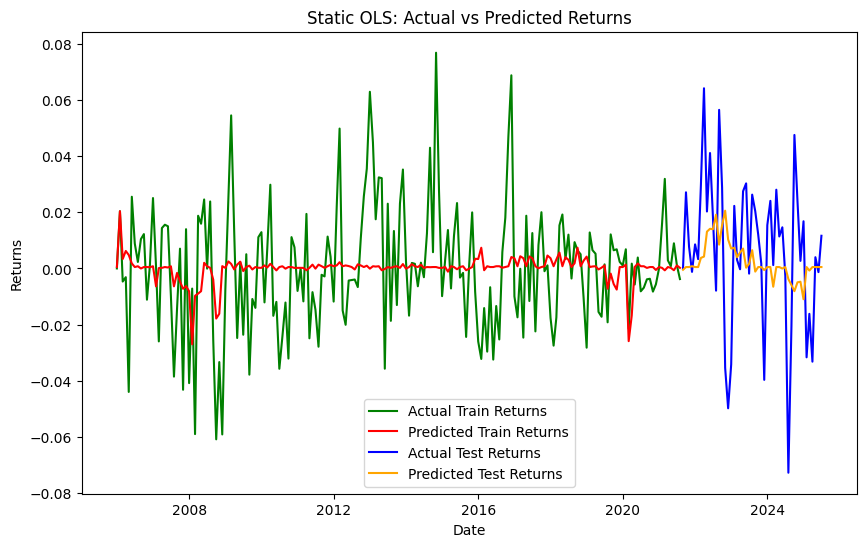

In [15]:
import statsmodels.api as sm

# 1. Prepare your factors and target
X = X_inflation_interest_current_diff_imp3_train  # shape: (n_samples, 3)
Y = Y_train_USDJPY_pct  # shape: (n_samples,)

# 2. Add constant (intercept) to factors
X_const = sm.add_constant(X)

# 3. Fit static OLS regression
model_ols = sm.OLS(Y, X_const).fit()

# 4. Print summary for interpretation
print(model_ols.summary())

# 5. Predict on train and test sets
Y_pred_train = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_train))
Y_pred_test = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_test))

# 6. Plot actual vs predicted returns
plt.figure(figsize=(10, 6))
plt.plot(train_set_swaps['month-year'], Y_train_USDJPY_pct, label='Actual Train Returns', color='green')
plt.plot(train_set_swaps['month-year'], Y_pred_train, label='Predicted Train Returns', color='red')
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='Actual Test Returns', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_test, label='Predicted Test Returns', color='orange')
plt.title('Static OLS: Actual vs Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

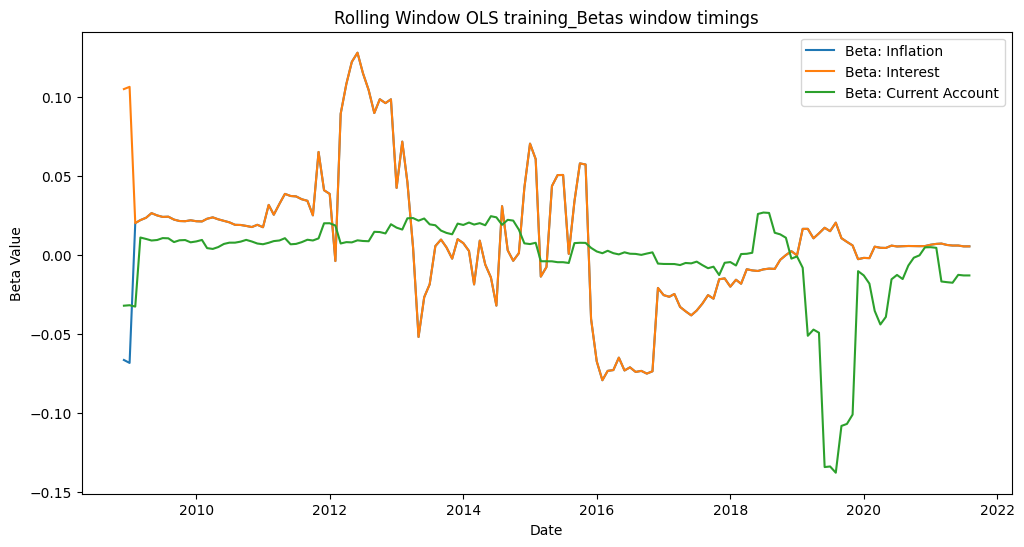

In [16]:
#Calculate rolling betas for the train set
import statsmodels.api as sm

window = 36 # rolling window size (months)
train_betas = []
train_dates = []

X = X_inflation_interest_current_diff_imp3_train
Y = Y_train_USDJPY_pct
date_index = train_set_swaps['month-year'].reset_index(drop=True)

for start in range(len(X) - window + 1):
    end = start + window
    X_window = X[start:end]
    Y_window = Y[start:end]
    X_window_const = sm.add_constant(X_window)
    model = sm.OLS(Y_window, X_window_const).fit()
    train_betas.append(model.params.values)
    train_dates.append(date_index[end-1])

train_betas = np.array(train_betas)
train_dates = np.array(train_dates)

# Plot time-varying betas
plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_betas[:, 1], label='Beta: Inflation')
plt.plot(train_dates, train_betas[:, 2], label='Beta: Interest')
plt.plot(train_dates, train_betas[:, 3], label='Beta: Current Account')
plt.title('Rolling Window OLS training_Betas window timings')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

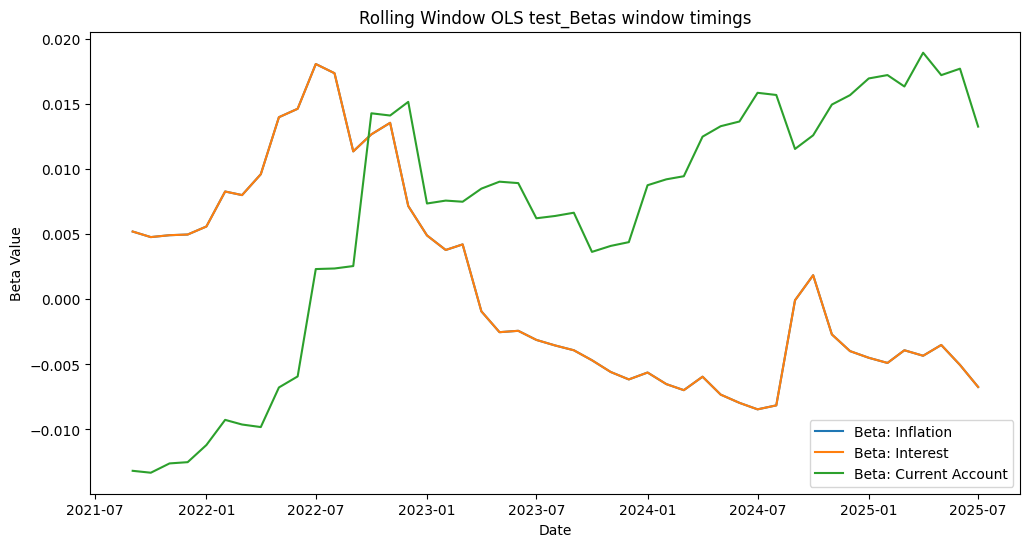

In [17]:
# Calculate rolling betas for the test set (out-of-sample, using only past data)

import statsmodels.api as sm

window = 36  # rolling window size
test_betas = []
test_dates = []

# Combine train and test features/targets for rolling calculation
X_all = np.vstack([X_inflation_interest_current_diff_imp3_train, X_inflation_interest_current_diff_imp3_test])
Y_all = np.concatenate([Y_train_USDJPY_pct, Y_test_USDJPY_pct])
date_all = np.concatenate([train_set_swaps['month-year'].values, test_set_swaps['month-year'].values])

test_start = len(X_inflation_interest_current_diff_imp3_train)
test_end = len(X_all)

for i in range(test_start, test_end):
    X_window = X_all[i-window:i]
    Y_window = Y_all[i-window:i]
    if len(X_window) == window:
        X_window_const = sm.add_constant(X_window)
        model = sm.OLS(Y_window, X_window_const).fit()
        test_betas.append(model.params)
        test_dates.append(date_all[i])

test_betas = np.array(test_betas)
test_dates = np.array(test_dates)

# Plot time-varying betas
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_betas[:, 1], label='Beta: Inflation')
plt.plot(test_dates, test_betas[:, 2], label='Beta: Interest')
plt.plot(test_dates, test_betas[:, 3], label='Beta: Current Account')
plt.title('Rolling Window OLS test_Betas window timings')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()
# test_betas now contains rolling betas for the test set, aligned with test_dates

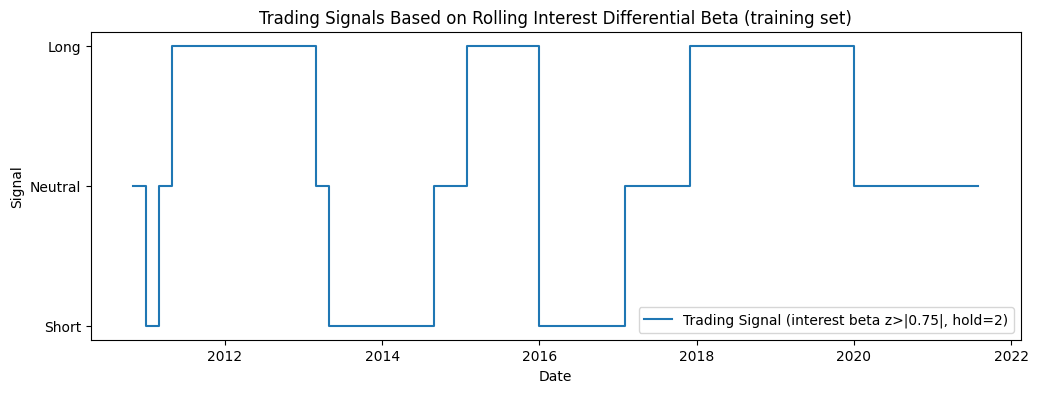

In [18]:
# Calculating the signals for the train set (only for interest rate diff)
# 1. Set a threshold for signal generation (original idea kept below, but replaced with z-threshold on smoothed beta)
# long_threshold = 0.1
# short_threshold = 0.1

# Use interest beta (column 2) and align to window ends
dates_train = pd.to_datetime(train_set_swaps['month-year'].values)
interest_beta_train = pd.Series(train_betas[:, 2], index=dates_train[window-1:])

# Smooth and standardize (reduces noise and regime shifts)
beta_smooth = interest_beta_train.ewm(span=6, adjust=False).mean()
beta_z = (beta_smooth - beta_smooth.rolling(24).mean()) / (beta_smooth.rolling(24).std() + 1e-8)
beta_z = beta_z.dropna()

# Align train returns to the same dates and use next-period return (no look-ahead)
train_returns = pd.Series(Y_train_USDJPY_pct.values, index=dates_train)
ret_aligned = train_returns.reindex(beta_z.index)
ret_fwd = ret_aligned.shift(-1)

# Pick a coarse z-threshold via a time split inside the train set (reduces overfitting)
z_grid = np.arange(0.5, 1.6, 0.25)
split = int(len(beta_z) * 0.7)
beta_cal, beta_val = beta_z.iloc[:split], beta_z.iloc[split:]
ret_cal, ret_val = ret_fwd.iloc[:split], ret_fwd.iloc[split:]

def sharpe_for(z):
    sig = np.sign(beta_cal.where(beta_cal.abs() >= z, 0)).astype(int)
    strat = (sig * ret_cal).dropna()
    return strat.mean() / (strat.std(ddof=0) + 1e-12)

best_z = max(z_grid, key=sharpe_for)

# Final signals on full train with a small minimum holding period to reduce churn
raw_sig = np.sign(beta_z.where(beta_z.abs() >= best_z, 0)).astype(int)
min_hold = 2 # months
sig = raw_sig.replace(0, np.nan).ffill(limit=min_hold-1).fillna(0).astype(int)

signals = sig.values
train_signals = signals  # optional alias for downstream checks
train_dates = beta_z.index.values  # used for plotting and forward test

# 3. Plot signals over time (kept from your original cell)
plt.figure(figsize=(12, 4))
plt.plot(train_dates, signals, drawstyle='steps-post',
         label=f'Trading Signal (interest beta z>|{best_z:.2f}|, hold={min_hold})')
plt.title('Trading Signals Based on Rolling Interest Differential Beta (training set)')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.yticks([-1, 0, 1], ['Short', 'Neutral', 'Long'])
plt.legend()
plt.show()

# 4. (Optional) You can apply this logic to other betas or combine signals for multi-factor strategies.

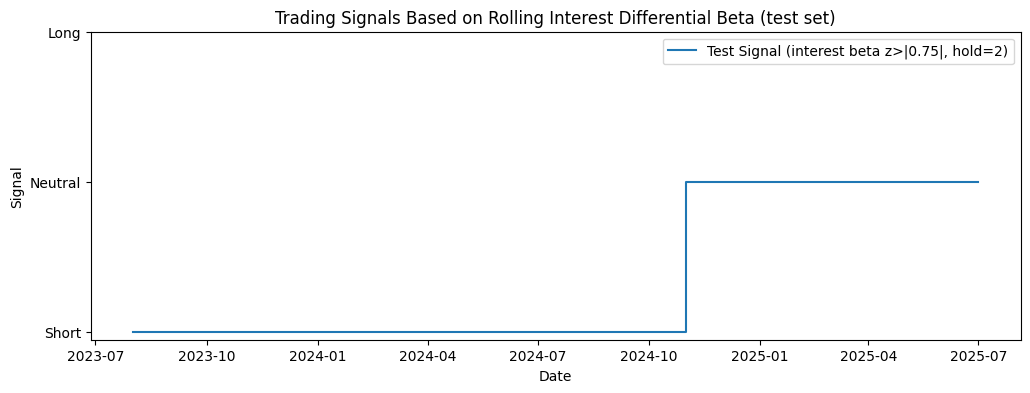

In [19]:
# Trading signals for the test set (derived from rolling test betas; uses train-chosen params)

# 1) Take interest beta (column 2) from test_betas and align to dates
interest_beta_test = pd.Series(test_betas[:, 2], index=pd.to_datetime(test_dates))

# 2) Smooth and standardize like the train side (uses only past test info)
beta_smooth_test = interest_beta_test.ewm(span=6, adjust=False).mean()
beta_z_test = (beta_smooth_test - beta_smooth_test.rolling(24).mean()) / (beta_smooth_test.rolling(24).std() + 1e-8)
beta_z_test = beta_z_test.dropna()

# 3) Apply the train-selected threshold and minimum holding period
raw_sig_test = np.sign(beta_z_test.where(beta_z_test.abs() >= best_z, 0)).astype(int)
sig_test = raw_sig_test.replace(0, np.nan).ffill(limit=min_hold-1).fillna(0).astype(int)

# 4) Export for downstream cells
test_signals = sig_test.values
test_signal_dates = sig_test.index.values  # dedicated dates for signals

# 5) Plot test signals
plt.figure(figsize=(12, 4))
plt.plot(test_signal_dates, test_signals, drawstyle='steps-post',
         label=f'Test Signal (interest beta z>|{best_z:.2f}|, hold={min_hold})')
plt.title('Trading Signals Based on Rolling Interest Differential Beta (test set)')
plt.xlabel('Date'); plt.ylabel('Signal'); plt.yticks([-1, 0, 1], ['Short', 'Neutral', 'Long'])
plt.legend(); plt.show()


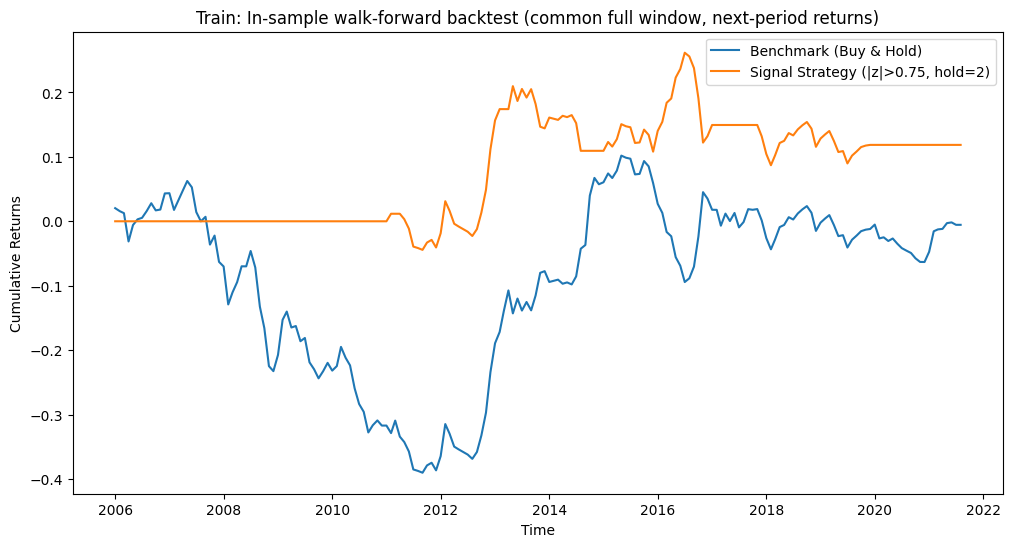

Chosen z-threshold: 0.75
Strategy total return: 0.11857135110949024
Benchmark total return: -0.005513117813409463
Strategy Sharpe ratio: 0.043816977361649724


In [20]:
# Forward testing with a common full window starting at the first available return
# ...existing code...

# 1) Build full-window series (start at first train return)
full_dates = pd.to_datetime(train_set_swaps['month-year'].values)
ret_full = pd.Series(Y_train_USDJPY_pct.values, index=full_dates)

# Use next-period return for no look-ahead
ret_fwd_full = ret_full.shift(-1)             # t -> t+1
ret_fwd_full = ret_fwd_full.fillna(0.0)       # last step has no next period

# 2) Put signals on the same full window; neutral (0) before/after they exist
sig_series = pd.Series(signals, index=pd.to_datetime(train_dates))  # from signal gen cell
sig_full = sig_series.reindex(full_dates).fillna(0).astype(int)

# 3) Strategy and benchmark on the same dates
strategy_returns_full = sig_full.values * ret_fwd_full.values
benchmark_returns_full = ret_fwd_full.values

# 4) Plot cumulative returns on the same window
plt.figure(figsize=(12, 6))
plt.plot(full_dates, np.cumsum(benchmark_returns_full), label='Benchmark (Buy & Hold)')
plt.plot(full_dates, np.cumsum(strategy_returns_full),
         label=f'Signal Strategy (|z|>{best_z:.2f}, hold={min_hold})')
plt.title('Train: In-sample walk-forward backtest (common full window, next-period returns)')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 5) Summary stats on the full window
eps = 1e-12
print("Chosen z-threshold:", float(best_z))
print("Strategy total return:", float(np.sum(strategy_returns_full)))
print("Benchmark total return:", float(np.sum(benchmark_returns_full)))
print("Strategy Sharpe ratio:", float(np.mean(strategy_returns_full) / (np.std(strategy_returns_full) + eps)))

# Optional: if you prefer compounding rather than summing, replace np.cumsum with:
# cum_bench = np.cumprod(1 + benchmark_returns_full) - 1
# cum_strat = np.cumprod(1 + strategy_returns_full) - 1
# ...existing code...


In [21]:
#evaluating the model, maybe changing thresholds to short below 0.1 ? what to do when the signal gives no information ? when the signal ==1 ?

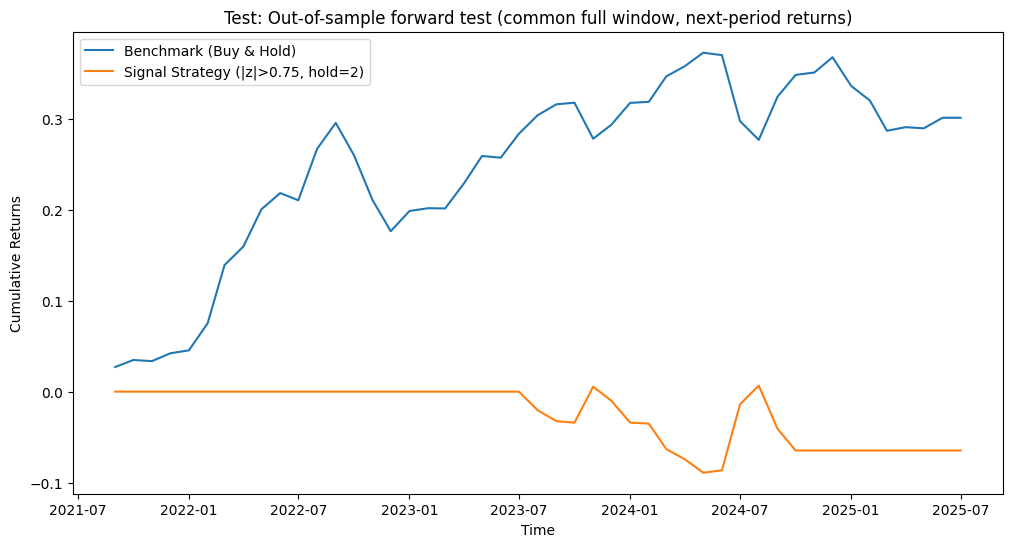

Chosen z-threshold (from train): 0.75
Test Strategy total return: -0.06476980773206675
Test Benchmark total return: 0.3013641675865869
Test Strategy Sharpe ratio: -0.08440467111434144


In [22]:
# Forward testing on the test set with a common full window starting at the first test return

# 1) Build full-window series (start at first test return)
test_full_dates = pd.to_datetime(test_set_swaps['month-year'].values)
ret_full_test = pd.Series(Y_test_USDJPY_pct.values, index=test_full_dates)

# Use next-period return for no look-ahead
ret_fwd_test_full = ret_full_test.shift(-1)     # t -> t+1
ret_fwd_test_full = ret_fwd_test_full.fillna(0.0)

# 2) Put test signals on the same full window; neutral (0) before/after they exist
# ...existing code...
# 2) Put test signals on the same full window; neutral (0) before/after they exist
sig_series_test = pd.Series(test_signals, index=pd.to_datetime(test_signal_dates))  # was: test_dates
sig_full_test = sig_series_test.reindex(test_full_dates).fillna(0).astype(int)
# ...existing code...

# 3) Strategy and benchmark on the same dates (common window)
strategy_returns_test_full = sig_full_test.values * ret_fwd_test_full.values
benchmark_returns_test_full = ret_fwd_test_full.values

# 4) Plot cumulative returns on the same window
plt.figure(figsize=(12, 6))
plt.plot(test_full_dates, np.cumsum(benchmark_returns_test_full), label='Benchmark (Buy & Hold)')
plt.plot(test_full_dates, np.cumsum(strategy_returns_test_full),
       label=f'Signal Strategy (|z|>{best_z:.2f}, hold={min_hold})')
plt.title('Test: Out-of-sample forward test (common full window, next-period returns)')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 5) Summary stats on the full test window
eps = 1e-12
print('Chosen z-threshold (from train):', float(best_z))
print('Test Strategy total return:', float(np.sum(strategy_returns_test_full)))
print('Test Benchmark total return:', float(np.sum(benchmark_returns_test_full)))
print('Test Strategy Sharpe ratio:', float(np.mean(strategy_returns_test_full) / (np.std(strategy_returns_test_full) + eps)))

#wednesday week -1 improvements
To improve your out-of-sample forward test results and make your signals perform better on unseen data, consider the following strategies:

1. Enhance Feature Engineering
Add More Predictive Features: Include additional macroeconomic indicators, market sentiment data, or technical indicators that may influence currency returns.
Lagged Features: Incorporate lagged versions of your independent variables to capture delayed effects.
Interaction Terms: Create interaction terms between features to capture non-linear relationships.
2. Improve Signal Generation
Dynamic Thresholds: Use adaptive thresholds for signal generation based on market conditions, such as volatility.
Combine Signals: Use multiple factors to generate a composite signal, combining inflation, interest, and current account differentials.
Smooth Signals: Apply smoothing techniques to reduce noise and avoid over-trading.
3. Regularize the Model
Ridge or Lasso Regression: Use regularization to prevent overfitting by penalizing large coefficients.
Principal Component Analysis (PCA): Reduce dimensionality to focus on the most important components.
4. Use More Robust Models
Tree-Based Models: Use models like Random Forests or Gradient Boosting to capture non-linear relationships.
Time Series Models: Consider ARIMA, VAR, or LSTM models for sequential data.
5. Refine Data Preprocessing
Stationarity: Ensure all features are stationary by differencing or detrending.
Scaling: Standardize or normalize features to ensure consistent scaling.
6. Improve Backtesting Framework
Walk-Forward Validation: Use a rolling window to train and test the model iteratively, simulating real-world conditions.
Transaction Costs: Incorporate transaction costs into your strategy to ensure realistic performance.
7. Analyze and Adjust Signals
Neutral Periods: Introduce a "neutral" zone where no trades are made if signals are weak.
Signal Filtering: Filter out weak or noisy signals to focus on stronger trends.
8. Evaluate Model Assumptions
Check Multicollinearity: Ensure independent variables are not highly correlated.
Residual Analysis: Analyze residuals to ensure the model captures patterns effectively.
9. Optimize Hyperparameters
Use grid search or Bayesian optimization to find the best parameters for your model.
10. Incorporate Market Regimes
Segment data into different market regimes (e.g., high volatility, low volatility) and train separate models for each regime.
By implementing these strategies, you can improve the robustness of your signals and enhance performance on unseen data. Let me know if you'd like further clarification on any of these points!

Generate
Code
Markdown
Run All
Restart
Clear All Outputs
View data
Python 3.11.9

GitHub Copilot

Short answer: not strictly — follow a prioritized, iterative order (clean → engineer → validate → model → tune → test → analyze) and loop back. That keeps risk of wasted effort low and speeds learning.

Suggested priority (one pass then iterate)

1. Data quality & alignment  
   - Verify dates, remove/flag bad rows, ensure features and returns are correctly lagged (no look‑ahead).  
   - Fix stationarity or obvious seasonality issues.

2. Baseline & metrics  
   - Build a simple, reproducible baseline (current approach). Define target metrics (Sharpe, CAGR, max drawdown, turnover, P&L net costs).

3. Feature engineering  
   - Add lags, interactions, simple technicals, volatility and macro signals. Keep a feature log so you can attribute changes.

4. Robust backtest (framework)  
   - Implement walk‑forward / rolling retrain, enforce no look‑ahead, add transaction costs and slippage, measure turnover.

5. Regularization & dimensionality reduction  
   - Apply PCA or Ridge/Lasso to stabilize coefficients and reduce overfitting.

6. Model exploration  
   - Try a small set of robust models (regularized linear, tree ensembles, simple time‑series models). Compare with baseline on forward folds, not just in‑sample.

7. Signal generation & execution rules  
   - Smooth/filter signals, introduce neutral bands, impose min hold or cooldown, cap position size.

8. Hyperparameter tuning & model selection using forward folds  
   - Optimize on rolling validation splits. Prefer conservative choices that generalize across folds.

9. Regime handling & ensemble  
   - If performance varies by regime, detect regimes (volatility or macro) and use specialized models or ensemble weighting.

10. Analyze residuals & robustness checks  
   - Check multicollinearity, residual structure, feature importance stability, and run sensitivity/overfitting tests (e.g., randomization, walk‑forward consistency).

How to run this efficiently
- Make a checklist and do small experiments per step.  
- Use warm starts: each iteration should aim to improve forward-fold metrics, not just in-sample.  
- If a change improves train but hurts forward folds, revert or regularize more.

Next immediate actions (recommended)
- Fix any date/misalignment issues and confirm forward returns are properly shifted.  
- Add one or two simple lagged features and rerun a single walk‑forward experiment.  
- Add transaction cost and turnover reporting.

I can produce a compact checklist or prioritized task list for your notebook if you want.

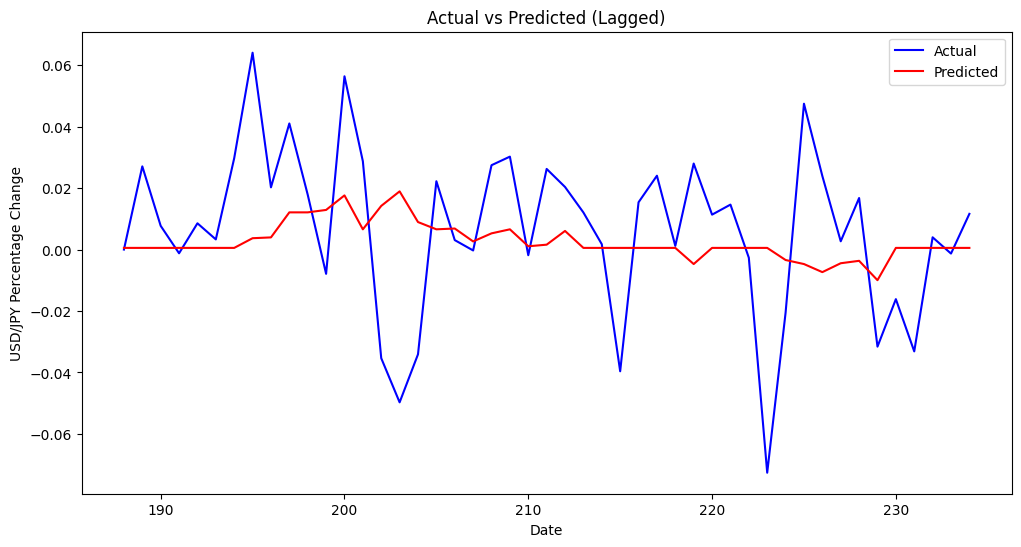

In [23]:
#implementing lag
# Lagging the independent variables by 1 month, we take the lagging of the raw indepdnednet variable data, 
# apply differencing and then running the regressions,
X3_current_account_test_lag = X3_current_account_test.copy()
X2_interest_test_lag = X2_interest_test.copy()
X1_inflation_test_lag = X1_inflation_test.copy()

X3_current_account_train_lag = X3_current_account_train.copy()
X2_interest_train_lag = X2_interest_train.copy()
X1_inflation_train_lag = X1_inflation_train.copy()

#lets implement lag by one month, by shifting the data roll, and then leaving the first row as nan
X3_current_account_test_lag = np.roll(X3_current_account_test_lag, shift=1, axis=0)
X3_current_account_test_lag[0] = np.nan
X2_interest_test_lag = np.roll(X2_interest_test_lag, shift=1, axis=0)
X2_interest_test_lag[0] = np.nan
X1_inflation_test_lag = np.roll(X1_inflation_test_lag, shift=1, axis=0)
X1_inflation_test_lag[0] = np.nan

X3_current_account_train_lag = np.roll(X3_current_account_train_lag, shift=1, axis=0)
X3_current_account_train_lag[0] = np.nan

X2_interest_train_lag = np.roll(X2_interest_train_lag, shift=1, axis=0)
X2_interest_train_lag[0] = np.nan

X1_inflation_train_lag = np.roll(X1_inflation_train_lag, shift=1, axis=0)
X1_inflation_train_lag[0] = np.nan
#lets forward fill all nan rows (only the first rows)
X1_inflation_train_lag[0] = X1_inflation_train_lag[1]
X2_interest_train_lag[0] = X2_interest_train_lag[1]
X3_current_account_train_lag[0] = X3_current_account_train_lag[1]

X1_inflation_test_lag[0] = X1_inflation_train_lag[1]
X2_interest_test_lag[0] = X2_interest_test_lag[1]
X3_current_account_test_lag[0] = X3_current_account_test_lag[1]



#lets apply differencing to make our data stationary
def apply_differencing(arr):
    """
    Applies differencing to a numpy array to make it stationary.
    
    Parameters:
    arr (np.ndarray): The array to apply differencing to.
    
    Returns:
    np.ndarray: The differenced array.
    """
    # Convert to pandas Series for diff, then back to numpy array
    return pd.Series(arr.flatten()).diff().fillna(0).values.reshape(-1, 1)

#converting to numpy arrays
X3_current_account_test_lag = apply_differencing(X3_current_account_test_lag)
X2_interest_test_lag = apply_differencing(X2_interest_test_lag)
X1_inflation_test_lag = apply_differencing(X1_inflation_test_lag)

X3_current_account_train_lag = apply_differencing(X3_current_account_train_lag)
X2_interest_train_lag = apply_differencing(X2_interest_train_lag)
X1_inflation_train_lag = apply_differencing(X1_inflation_train_lag)


#lets run our linear regression to see if anything changed perhaps ? (single var)
modelled_lag = LinearRegression()

modelled_lag.fit(X2_interest_train_lag, Y_train_USDJPY_pct)
Y_predict_lag = modelled_lag.predict(X2_interest_test_lag)

#lets plot our results for both the fitting and the prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Y_test_USDJPY_pct.index, Y_test_USDJPY_pct, label='Actual', color='blue')
plt.plot(Y_test_USDJPY_pct.index, Y_predict_lag, label='Predicted', color='red')
plt.title('Actual vs Predicted (Lagged)')
plt.xlabel('Date')
plt.ylabel('USD/JPY Percentage Change')
plt.legend()
plt.show()


In [24]:
print(modelled_lag.score(X2_interest_train_lag, Y_train_USDJPY_pct) ) # Training score
print(modelled_lag.score(X2_interest_test_lag, Y_test_USDJPY_pct) )  # Testing score

0.03256644184075819
-0.06652964886792856


#our trainign scores and testing scores are not too far apart !! this is a very good sign, means our model is underfitting, but the generalization is good. lets inlcude all thw factors in our linear regression

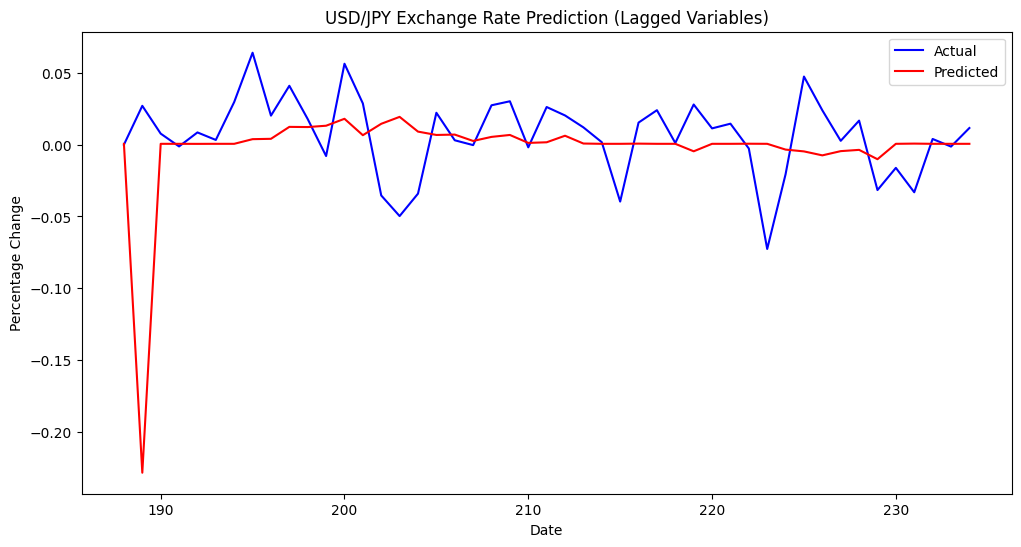

In [25]:
#combining all our indepdendent variables in a single 2D array
X_inflation_interest_current_lagged_train= np.column_stack((X3_current_account_train_lag, X2_interest_train_lag, X1_inflation_train_lag))
X_inflation_interest_current_lagged_test= np.column_stack((X3_current_account_test_lag, X2_interest_test_lag, X1_inflation_test_lag))

#applying our 3 factor model with lagged variables
modelled_lag_3var = LinearRegression().fit(X_inflation_interest_current_lagged_train, Y_train_USDJPY_pct)
Y_predict_lag = modelled_lag_3var.predict(X_inflation_interest_current_lagged_test)

#plotting our results

plt.figure(figsize=(12, 6))
plt.plot(Y_test_USDJPY_pct.index, Y_test_USDJPY_pct, label='Actual', color='blue')
plt.plot(Y_test_USDJPY_pct.index, Y_predict_lag, label='Predicted', color='red')
plt.title('USD/JPY Exchange Rate Prediction (Lagged Variables)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

In [26]:
#computing R^2 of our latest model
print(f'Train score: {modelled_lag_3var.score(X_inflation_interest_current_lagged_train, Y_train_USDJPY_pct)}')  # Training score
print(f'Test score: {modelled_lag_3var.score(X_inflation_interest_current_lagged_test, Y_test_USDJPY_pct)}')  # Testing score


Train score: 0.033802597856343986
Test score: -1.991261853535942


In [27]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_inflation_interest_current_lagged_train, Y_train_USDJPY_pct)
print(ridge_model.score(X_inflation_interest_current_lagged_test, Y_test_USDJPY_pct))

-0.23398201004690966


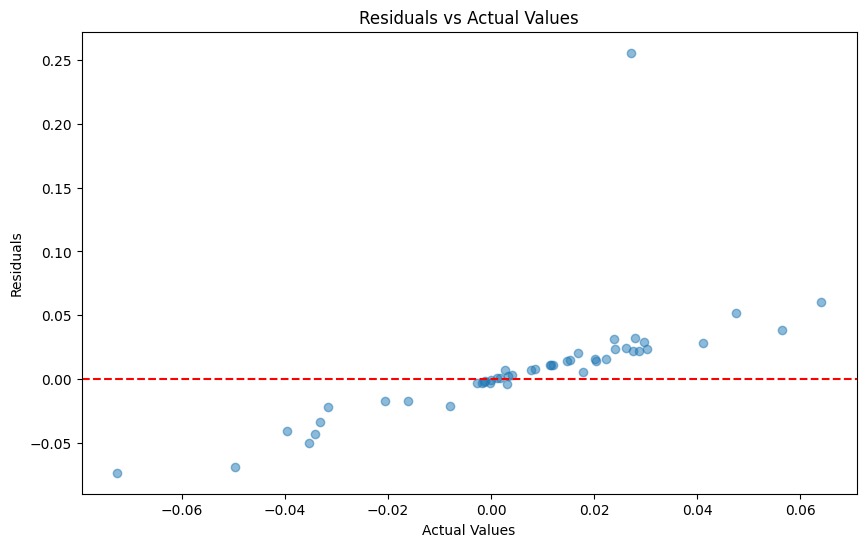

In [28]:
residuals = Y_test_USDJPY_pct - Y_predict_lag
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_USDJPY_pct, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [29]:
# Identify outliers
outliers = residuals[np.abs(residuals) > 0.05]  # Example threshold
print(outliers)

189    0.255676
195    0.060240
203   -0.069137
223   -0.073276
225    0.052156
Name: USDJPY_20Y, dtype: float64



Model comparison (test set)
                         r2_test  mse_test  mae_test  cv_r2_mean
model                                                           
SVR                    -0.003426  0.000717  0.020049   -0.164126
AdaBoost               -0.221928  0.000874  0.022741   -0.686267
HistGradientBoosting   -0.308559  0.000936  0.023433   -0.228671
KNN                    -0.407980  0.001007  0.024415   -0.375855
RandomForest           -0.523455  0.001089  0.025525   -0.605371
ExtraTrees             -0.562165  0.001117  0.025704   -0.824867
GradientBoosting       -0.772954  0.001268  0.027128   -1.132943
MLP                  -117.844926  0.084967  0.109283   -2.339505


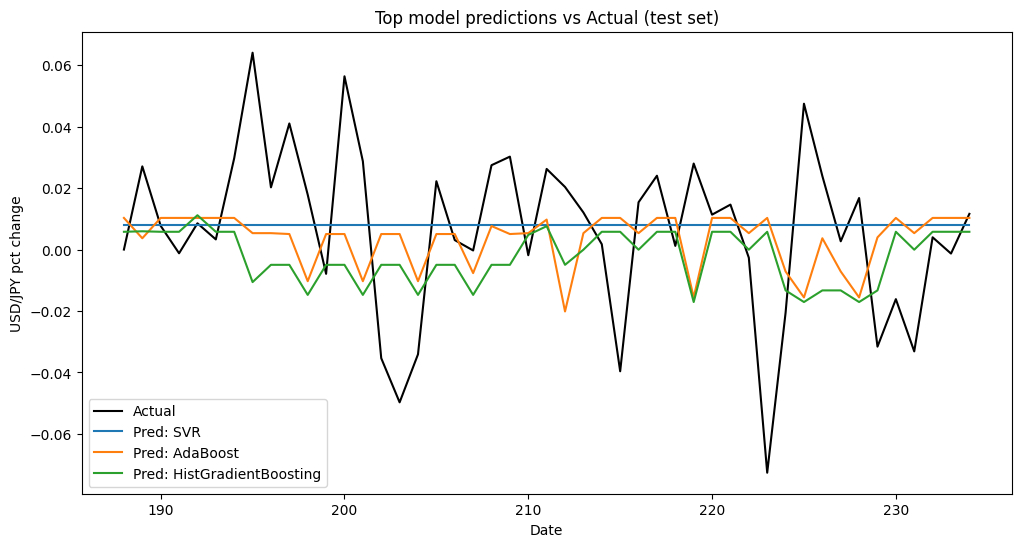


Note: If XGBoost/LightGBM were not installed they were skipped. Install them if you want to include them.


In [30]:
# === Non-linear model experiments: train, evaluate, compare ===
# This cell fits several non-linear regressors using a simple preprocessing pipeline
# (mean imputation + standard scaling). It reports test R2/MSE/MAE and a small
# time-series cross-validation score when possible.

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Optional booster libraries (skip if not installed)
has_xgb = False
has_lgb = False
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception:
    pass
try:
    from lightgbm import LGBMRegressor
    has_lgb = True
except Exception:
    pass

models = {
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'MLP': MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
}
if has_xgb:
    models['XGBoost'] = XGBRegressor(random_state=42, n_estimators=200, verbosity=0)
if has_lgb:
    models['LightGBM'] = LGBMRegressor(random_state=42, n_estimators=200)

# Prepare training/test arrays (fall back to .values if pandas Series)
X_train = X_inflation_interest_current_lagged_train
X_test = X_inflation_interest_current_lagged_test

y_train = Y_train_USDJPY_pct.values if hasattr(Y_train_USDJPY_pct, 'values') else np.asarray(Y_train_USDJPY_pct)
y_test = Y_test_USDJPY_pct.values if hasattr(Y_test_USDJPY_pct, 'values') else np.asarray(Y_test_USDJPY_pct)

# Results collector
results = []
predictions = {}

# TimeSeriesSplit for light CV on the training window
tscv = TimeSeriesSplit(n_splits=3)

for name, base_model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', base_model)
    ])

    try:
        # Fit on full train
        pipe.fit(X_train, y_train)
        # Predict on test
        y_pred = pipe.predict(X_test)
        predictions[name] = y_pred

        # Test metrics
        r2_t = r2_score(y_test, y_pred)
        mse_t = mean_squared_error(y_test, y_pred)
        mae_t = mean_absolute_error(y_test, y_pred)

        # Fast time-series cross-val on train only (wrapped in try to avoid errors)
        cv_mean = np.nan
        try:
            cv_scores = cross_val_score(pipe, X_train, y_train, cv=tscv, scoring='r2', n_jobs=1)
            cv_mean = float(np.mean(cv_scores))
        except Exception:
            cv_mean = np.nan

        results.append({'model': name, 'r2_test': float(r2_t), 'mse_test': float(mse_t), 'mae_test': float(mae_t), 'cv_r2_mean': cv_mean})
    except Exception as e:
        results.append({'model': name, 'error': str(e)})

# Present results as a dataframe sorted by r2_test
res_df = pd.DataFrame(results).set_index('model')
if 'r2_test' in res_df.columns:
    res_df = res_df.sort_values('r2_test', ascending=False)

print('\nModel comparison (test set)')
print(res_df)

# Save results and predictions into the notebook namespace for later use
_nonlin_results = res_df
_nonlin_predictions = predictions

# Quick plot of top 3 models' predictions vs actual (if at least one model succeeded)
successful = [m for m in results if 'r2_test' in m]
if len(successful) > 0:
    top_models = [m['model'] for m in sorted(successful, key=lambda x: x['r2_test'], reverse=True)[:3]]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test_USDJPY_pct.index, y_test, label='Actual', color='black')
    for name in top_models:
        plt.plot(Y_test_USDJPY_pct.index, predictions[name], label=f'Pred: {name}')
    plt.title('Top model predictions vs Actual (test set)')
    plt.xlabel('Date')
    plt.ylabel('USD/JPY pct change')
    plt.legend()
    plt.show()
else:
    print('\nNo successful fits found. Check errors in the results dataframe.')

print('\nNote: If XGBoost/LightGBM were not installed they were skipped. Install them if you want to include them.')
